## Bioinformatics - Data Collection and Pre-Processing

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('CHEMBL5027')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P39748', 'xref_name': None, 'xre...",Homo sapiens,Flap endonuclease 1,17.0,False,CHEMBL5027,"[{'accession': 'P39748', 'component_descriptio...",SINGLE PROTEIN,9606


In [3]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="Potency")

In [4]:
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Active,5982955,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,2.9935
1,None,inconclusive,5982956,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,23.7781
2,None,inconclusive,5982957,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,2.6679
3,None,Active,5982958,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,3.7686
4,None,Active,5982959,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,1.5003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11906,None,active,14429194,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,6.012
11907,None,active,14429195,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,42.5615
11908,None,inconclusive,14429196,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,23.9341
11909,None,active,14429197,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,None,None,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,None,None,Potency,uM,UO_0000065,None,33.8078


In [5]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [6]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

In [14]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,Active,5982955,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,2.9935
1,NaN,inconclusive,5982956,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,23.7781
2,NaN,inconclusive,5982957,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,2.6679
3,NaN,Active,5982958,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,3.7686
4,NaN,Active,5982959,[],CHEMBL1613922,PUBCHEM_BIOASSAY: qHTS Validation Assay for th...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,1.5003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11906,NaN,active,14429194,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,6.0120
11907,NaN,active,14429195,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,42.5615
11908,NaN,inconclusive,14429196,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,23.9341
11909,NaN,active,14429197,[],CHEMBL3214875,PubChem BioAssay. qHTS Assay for the Inhibitor...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Flap endonuclease 1,9606,NaN,NaN,Potency,uM,UO_0000065,NaN,33.8078


In [15]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (11911, 46) and (11855, 46)


In [16]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL508329,N#C/C(=C/c1ccc(O)c(O)c1)C(N)=S,2993.5
1,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23778.1
2,CHEMBL86931,NC[C@@H]1O[C@H](c2ccccc2)Cc2c1ccc(O)c2O,2667.9
3,CHEMBL19130,CN1CCc2cc(O)cc3c2[C@H]1Cc1ccc(O)c(O)c1-3,3768.6
4,CHEMBL164,O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,1500.3
...,...,...,...
11850,CHEMBL1897003,CC1CCN(C(=O)COC(=O)c2ccc([N+](=O)[O-])o2)CC1,6012.0
11851,CHEMBL3189047,COc1ccc(NC(=O)CN2C(=O)N/C(=C\c3cccn3-c3ccc(C(=...,42561.5
11852,CHEMBL1563898,O=c1cc2oc3cc(O)c(O)cc3c(-c3ccccc3[N+](=O)[O-])...,23934.1
11853,CHEMBL602127,CCCN(CCC)CCCNC(=O)c1cc2c(-c3ccc(OC)c(OC)c3)nn(...,33807.8


In [17]:
df3.standard_value.describe()

count     11855.000000
mean      55290.031388
std       29822.893040
min           1.600000
25%       31622.800000
50%       53581.800000
75%       89125.100000
max      199526.200000
Name: standard_value, dtype: float64

In [18]:
import numpy as np
def logtrans(input):
    logPotency = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        logPotency.append(-np.log10(molar))

    input['logPotency'] = logPotency
    x = input.drop('standard_value', axis = 1)
        
    return x

In [19]:
df_final = logtrans(df3)
df_final

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_55026/1097392414.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['logPotency'] = logPotency


,molecule_chembl_id,canonical_smiles,logPotency
0,CHEMBL508329,N#C/C(=C/c1ccc(O)c(O)c1)C(N)=S,5.523821
1,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,4.623823
2,CHEMBL86931,NC[C@@H]1O[C@H](c2ccccc2)Cc2c1ccc(O)c2O,5.573830
3,CHEMBL19130,CN1CCc2cc(O)cc3c2[C@H]1Cc1ccc(O)c(O)c1-3,5.423820
4,CHEMBL164,O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,5.823822
...,...,...,...
11850,CHEMBL1897003,CC1CCN(C(=O)COC(=O)c2ccc([N+](=O)[O-])o2)CC1,5.220981
11851,CHEMBL3189047,COc1ccc(NC(=O)CN2C(=O)N/C(=C\c3cccn3-c3ccc(C(=...,4.370983
11852,CHEMBL1563898,O=c1cc2oc3cc(O)c(O)cc3c(-c3ccccc3[N+](=O)[O-])...,4.620983
11853,CHEMBL602127,CCCN(CCC)CCCNC(=O)c1cc2c(-c3ccc(OC)c(OC)c3)nn(...,4.470983


In [20]:
df_final.logPotency.describe()

count    11855.000000
mean         4.395892
std          0.477570
min          3.700000
25%          4.050000
50%          4.270983
75%          4.500000
max          8.795880
Name: logPotency, dtype: float64

In [21]:
df_final.to_csv('data/XandY_11855x3.csv',index=False)

## Dataset Preparation

In [22]:
import pandas as pd
df = pd.read_csv('data/XandY_11855x3.csv')
df

,molecule_chembl_id,canonical_smiles,logPotency
0,CHEMBL508329,N#C/C(=C/c1ccc(O)c(O)c1)C(N)=S,5.523821
1,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,4.623823
2,CHEMBL86931,NC[C@@H]1O[C@H](c2ccccc2)Cc2c1ccc(O)c2O,5.573830
3,CHEMBL19130,CN1CCc2cc(O)cc3c2[C@H]1Cc1ccc(O)c(O)c1-3,5.423820
4,CHEMBL164,O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,5.823822
...,...,...,...
11850,CHEMBL1897003,CC1CCN(C(=O)COC(=O)c2ccc([N+](=O)[O-])o2)CC1,5.220981
11851,CHEMBL3189047,COc1ccc(NC(=O)CN2C(=O)N/C(=C\c3cccn3-c3ccc(C(=...,4.370983
11852,CHEMBL1563898,O=c1cc2oc3cc(O)c(O)cc3c(-c3ccccc3[N+](=O)[O-])...,4.620983
11853,CHEMBL602127,CCCN(CCC)CCCNC(=O)c1cc2c(-c3ccc(OC)c(OC)c3)nn(...,4.470983


In [23]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [24]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-24 14:05:09--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-24 14:05:10--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  28.1MB/s    in 0.9s    

2023-07-24 14:05:12 (28.1 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-24 14:05:12-

In [25]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [26]:
! bash padel.sh

Processing CHEMBL508329 in molecule.smi (1/11855). 
Processing CHEMBL29097 in molecule.smi (2/11855). 
Processing CHEMBL86931 in molecule.smi (3/11855). 
Processing CHEMBL19130 in molecule.smi (4/11855). 
Processing CHEMBL164 in molecule.smi (5/11855). 
Processing CHEMBL244948 in molecule.smi (6/11855). 
Processing CHEMBL59 in molecule.smi (7/11855). 
Processing CHEMBL68534 in molecule.smi (8/11855). 
Processing CHEMBL1622540 in molecule.smi (10/11855). Average speed: 1.45 s/mol.
Processing CHEMBL1256623 in molecule.smi (9/11855). Average speed: 2.88 s/mol.
Processing CHEMBL313972 in molecule.smi (11/11855). Average speed: 0.98 s/mol.
Processing CHEMBL432 in molecule.smi (12/11855). Average speed: 0.78 s/mol.
Processing CHEMBL41140 in molecule.smi (13/11855). Average speed: 0.64 s/mol.
Processing CHEMBL578741 in molecule.smi (14/11855). Average speed: 0.54 s/mol.
Processing CHEMBL337309 in molecule.smi (15/11855). Average speed: 0.46 s/mol.
Processing CHEMBL588 in molecule.smi (16/1185

In [27]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv',index=False)
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL59,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL508329,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL244948,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1256623,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL164,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,CHEMBL1321188,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11851,CHEMBL3189047,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11852,CHEMBL602127,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11853,CHEMBL1563898,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11851,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11852,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11853,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df3_X.to_csv('data/Xdata_11855x881.csv',index = False)

In [30]:
df3_Y = df['logPotency']
df3_Y

0        5.523821
1        4.623823
2        5.573830
3        5.423820
4        5.823822
           ...   
11850    5.220981
11851    4.370983
11852    4.620983
11853    4.470983
11854    4.420983
Name: logPotency, Length: 11855, dtype: float64

In [31]:
df3_Y.to_csv('data/Ydata_11855.csv',index = False)

## Model Comparisons

In [32]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pickle

In [33]:
X = pd.read_csv('data/Xdata_11855x881.csv')
Y = pd.read_csv('data/Ydata_11855.csv')

In [37]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.02)
X = selection.fit(X)
len(list(selection.get_feature_names_out()))

436

In [39]:
features_list = list(selection.get_feature_names_out())

In [40]:
X = pd.read_csv('data/Xdata_11855x881.csv')
selection = VarianceThreshold(threshold=0.02)
X = selection.fit_transform(X)

In [47]:
X = pd.read_csv('data/Xdata_11855x881.csv')
X = X[features_list]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,...,PubchemFP813,PubchemFP818,PubchemFP819,PubchemFP820,PubchemFP821,PubchemFP822,PubchemFP824,PubchemFP826,PubchemFP830,PubchemFP833
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
11851,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11852,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
11853,0,0,1,1,0,0,1,1,1,0,...,0,0,1,0,1,0,1,0,0,0


<Axes: >

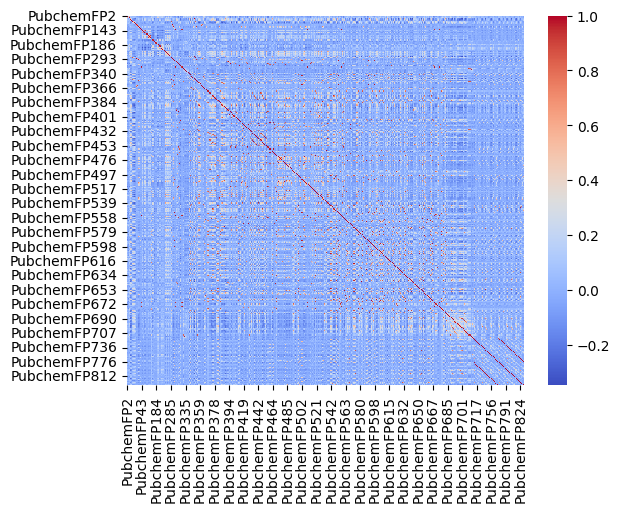

In [48]:
# Create a correlation matrix
X_corr = pd.DataFrame(X)
corr_matrix = X_corr.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [50]:
corr_matrix
corr_matrix.to_csv('data/corr_matrix_436.csv')

In [55]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
len(to_drop)
# X_corrdel = X_corr.drop(to_drop, axis=1)
# #X_corrdel.to_csv('data/Xdata_correlationdropped_7546x129.csv')
# X_corrdel.shape

236

In [53]:
df_final = X.drop(to_drop,axis=1)
df_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,...,PubchemFP749,PubchemFP750,PubchemFP755,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP759,PubchemFP763,PubchemFP767,PubchemFP770
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11851,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11852,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11853,0,0,1,1,0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0


In [61]:
df_final.to_csv('data/XdataFinal_11855x200.csv',index = False)

In [59]:
selected_features = df_final.columns.tolist()
len(selected_features)

200

In [57]:
pickle.dump((selected_features),open('data/selected_features.pkl','wb'))

## Regressor Model Training

In [62]:
X = pd.read_csv('data/XdataFinal_11855x200.csv')
X.shape

(11855, 200)

In [64]:
X = X.to_numpy()
print(X.shape)
print(type(X))

(11855, 200)
<class 'numpy.ndarray'>


In [65]:
Y = pd.read_csv('data/Ydata_11855.csv')
Y = Y.logPotency
print(Y.shape)
print(type(Y))

(11855,)
<class 'pandas.core.series.Series'>


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [67]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [02:34<00:00,  3.67s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [02:00<00:00,  2.87s/it]


In [68]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.92,0.14,15.42
DecisionTreeRegressor,0.91,0.92,0.14,0.39
ExtraTreeRegressor,0.91,0.92,0.14,0.29
GaussianProcessRegressor,0.91,0.92,0.14,23.57
MLPRegressor,0.84,0.84,0.19,12.22
RandomForestRegressor,0.78,0.79,0.22,11.11
BaggingRegressor,0.73,0.73,0.25,1.18
XGBRegressor,0.60,0.60,0.30,1.32
SVR,0.35,0.37,0.38,17.09


In [69]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TweedieRegressor,-0.08,0.01,0.46,0.22
GammaRegressor,-0.08,0.01,0.46,0.08
BayesianRidge,-0.09,0.01,0.46,0.50
PoissonRegressor,-0.09,0.00,0.46,0.16
OrthogonalMatchingPursuitCV,-0.09,0.00,0.46,0.14
ElasticNetCV,-0.09,0.00,0.46,0.83
LassoCV,-0.09,0.00,0.46,1.23
LassoLarsCV,-0.09,0.00,0.46,0.42
LassoLarsIC,-0.09,0.00,0.46,0.51


## Artificial Neural Network

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers
from keras.optimizers.legacy import Adam,Adagrad,Adamax
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [149]:
X = pd.read_csv('data/XdataFinal_11855x200.csv')
X = X.to_numpy()
Y = pd.read_csv('data/Ydata_11855.csv')
Y = Y.logPotency

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=30)

In [151]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)

(11855, 200)
(11855,)
(9484, 200)
(2371, 200)


Epoch 1/100
949/949 [==============================] - 1s 946us/step - loss: 2.3886 - mae: 0.4647 - val_loss: 0.3217 - val_mae: 0.3195
Epoch 2/100
949/949 [==============================] - 1s 881us/step - loss: 0.3522 - mae: 0.3511 - val_loss: 0.3186 - val_mae: 0.3165
Epoch 3/100
949/949 [==============================] - 1s 869us/step - loss: 0.3401 - mae: 0.3397 - val_loss: 0.3262 - val_mae: 0.3261
Epoch 4/100
949/949 [==============================] - 1s 924us/step - loss: 0.3358 - mae: 0.3357 - val_loss: 0.2924 - val_mae: 0.2924
Epoch 5/100
949/949 [==============================] - 1s 879us/step - loss: 0.3279 - mae: 0.3279 - val_loss: 0.2981 - val_mae: 0.2981
Epoch 6/100
949/949 [==============================] - 1s 879us/step - loss: 0.3268 - mae: 0.3268 - val_loss: 0.2994 - val_mae: 0.2994
Epoch 7/100
949/949 [==============================] - 1s 896us/step - loss: 0.3247 - mae: 0.3247 - val_loss: 0.2963 - val_mae: 0.2963
Epoch 8/100
949/949 [==============================] - 

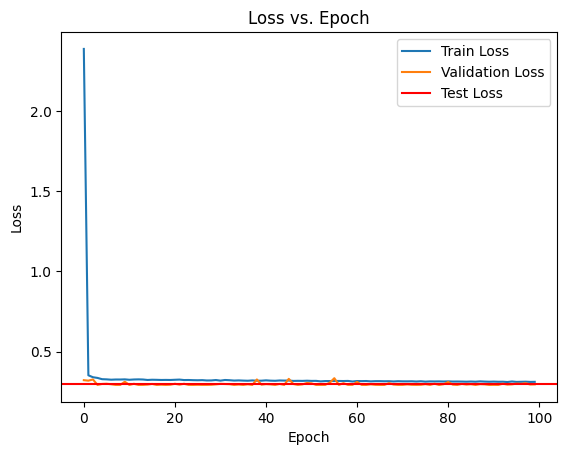

In [162]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(200,), kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_absolute_error", optimizer='adam', metrics=['mae'])

optimizer = Adamax(learning_rate=0.000001)

history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Plot the train loss history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
test_loss = model.evaluate(X_test, y_test)[0]
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [153]:
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)

75/75 [==============================] - 0s 429us/step - loss: 0.2957 - mae: 0.2957
Test loss: 0.2957168519496918
Test accuracy: 0.2957168519496918
R-squared score: -0.022976514246806135


In [143]:
y_pred

array([[4.282687 ],
       [4.282767 ],
       [4.2824397],
       ...,
       [4.282406 ],
       [4.2824855],
       [4.2823505]], dtype=float32)

 1/75 [..............................] - ETA: 0s

75/75 [==============================] - 0s 326us/step


<Axes: ylabel='logPotency'>

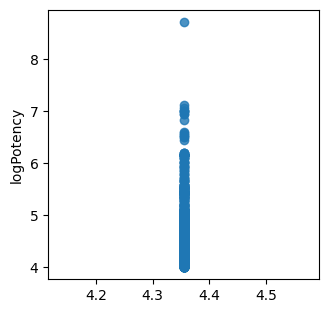

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
y_predicted = model.predict(X_test)
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_predicted, y = y_test, fit_reg=True)

## Final Model saving

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np

In [17]:
X = pd.read_csv('data/Xdata_13699x881.csv')
Y = pd.read_csv('data/Ydata_13699.csv')

In [18]:
Y = Y.pIC50

In [19]:
selected_features = pickle.load(open("data/selected_features.pkl","rb"))
selected_features

['PubchemFP2',
 'PubchemFP3',
 'PubchemFP12',
 'PubchemFP13',
 'PubchemFP16',
 'PubchemFP17',
 'PubchemFP18',
 'PubchemFP19',
 'PubchemFP20',
 'PubchemFP23',
 'PubchemFP24',
 'PubchemFP25',
 'PubchemFP33',
 'PubchemFP37',
 'PubchemFP38',
 'PubchemFP43',
 'PubchemFP115',
 'PubchemFP143',
 'PubchemFP144',
 'PubchemFP150',
 'PubchemFP152',
 'PubchemFP157',
 'PubchemFP159',
 'PubchemFP179',
 'PubchemFP180',
 'PubchemFP185',
 'PubchemFP186',
 'PubchemFP187',
 'PubchemFP192',
 'PubchemFP193',
 'PubchemFP194',
 'PubchemFP199',
 'PubchemFP206',
 'PubchemFP256',
 'PubchemFP258',
 'PubchemFP259',
 'PubchemFP260',
 'PubchemFP261',
 'PubchemFP299',
 'PubchemFP300',
 'PubchemFP301',
 'PubchemFP305',
 'PubchemFP308',
 'PubchemFP333',
 'PubchemFP334',
 'PubchemFP335',
 'PubchemFP338',
 'PubchemFP339',
 'PubchemFP340',
 'PubchemFP341',
 'PubchemFP345',
 'PubchemFP346',
 'PubchemFP349',
 'PubchemFP352',
 'PubchemFP356',
 'PubchemFP357',
 'PubchemFP359',
 'PubchemFP364',
 'PubchemFP365',
 'PubchemFP366'

In [20]:
X = X[selected_features]
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP734,PubchemFP737,PubchemFP749,PubchemFP750,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP759,PubchemFP763,PubchemFP839
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13694,1,0,1,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
13695,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
13696,1,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
13697,1,0,1,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [21]:
X = X.to_numpy()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0]])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [22]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(165,)))
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(0.0525)))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])

In [23]:
model.fit(X,Y, epochs = 50, batch_size = 6)

Epoch 1/50
2284/2284 [==============================] - 1s 431us/step - loss: 1.3334 - mae: 1.0027
Epoch 2/50
2284/2284 [==============================] - 1s 424us/step - loss: 0.9397 - mae: 0.9028
Epoch 3/50
2284/2284 [==============================] - 1s 425us/step - loss: 0.8942 - mae: 0.8602
Epoch 4/50
2284/2284 [==============================] - 1s 419us/step - loss: 0.8658 - mae: 0.8346
Epoch 5/50
2284/2284 [==============================] - 1s 422us/step - loss: 0.8441 - mae: 0.8148
Epoch 6/50
2284/2284 [==============================] - 1s 436us/step - loss: 0.8232 - mae: 0.7960
Epoch 7/50
2284/2284 [==============================] - 1s 411us/step - loss: 0.8149 - mae: 0.7885
Epoch 8/50
2284/2284 [==============================] - 1s 435us/step - loss: 0.7980 - mae: 0.7723
Epoch 9/50
2284/2284 [==============================] - 1s 426us/step - loss: 0.7914 - mae: 0.7663
Epoch 10/50
2284/2284 [==============================] - 1s 425us/step - loss: 0.7788 - mae: 0.7543
Epoch 11/

In [25]:
model.save('data/my_model.keras')

In [215]:
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)

86/86 [==============================] - 0s 368us/step - loss: 0.8014 - mae: 0.7800
Test loss: 0.8013732433319092
Test accuracy: 0.7799758315086365
R-squared score: 0.33038555915184464


In [216]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(165,)))
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(0.0525)))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])

In [217]:
model.fit(X,Y, epochs = 50, batch_size = 6)

Epoch 1/50
2284/2284 [==============================] - 1s 425us/step - loss: 1.3137 - mae: 0.9919
Epoch 2/50
2284/2284 [==============================] - 1s 420us/step - loss: 0.9314 - mae: 0.8948
Epoch 3/50
2284/2284 [==============================] - 1s 427us/step - loss: 0.8922 - mae: 0.8594
Epoch 4/50
2284/2284 [==============================] - 1s 420us/step - loss: 0.8578 - mae: 0.8270
Epoch 5/50
2284/2284 [==============================] - 1s 413us/step - loss: 0.8378 - mae: 0.8100
Epoch 6/50
2284/2284 [==============================] - 1s 463us/step - loss: 0.8220 - mae: 0.7956
Epoch 7/50
2284/2284 [==============================] - 1s 432us/step - loss: 0.8139 - mae: 0.7888
Epoch 8/50
2284/2284 [==============================] - 1s 420us/step - loss: 0.7952 - mae: 0.7707
Epoch 9/50
2284/2284 [==============================] - 1s 416us/step - loss: 0.7856 - mae: 0.7613
Epoch 10/50
2284/2284 [==============================] - 1s 416us/step - loss: 0.7770 - mae: 0.7539
Epoch 11/

In [218]:
pickle.dump((model),open('data/trained_model.pkl','wb'))